# Simple Linear Regression

In this notebook, we'll build a linear regression model to predict `Sales` using an appropriate predictor variable.

## Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:

# # Recommended versions
# numpy 	1.26.4
# pandas	2.2.2
# matplotlib	3.7.1
# seaborn	0.10.0
# statsmodels	0.14.4
# sklearn	1.5.2

In [3]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd

In [4]:
# Read the given CSV file, and view some sample records

advertising = pd.read_csv("advertising.csv")
advertising.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

Let's inspect the various aspects of our dataframe

In [5]:
advertising.shape

(200, 4)

In [6]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
advertising.describe()

TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000

## Step 2: Visualising the Data

Let's now visualise our data using seaborn. We'll first make a pairplot of all the variables present to visualise which variables are most correlated to `Sales`.

In [8]:
import matplotlib.pyplot as plt 
import seaborn as sns


<Axes: xlabel='TV', ylabel='Sales'>

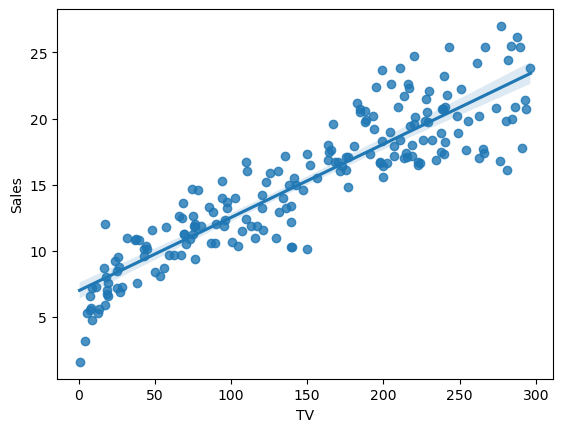

In [9]:
sns.regplot(x='TV', y='Sales',data=advertising)

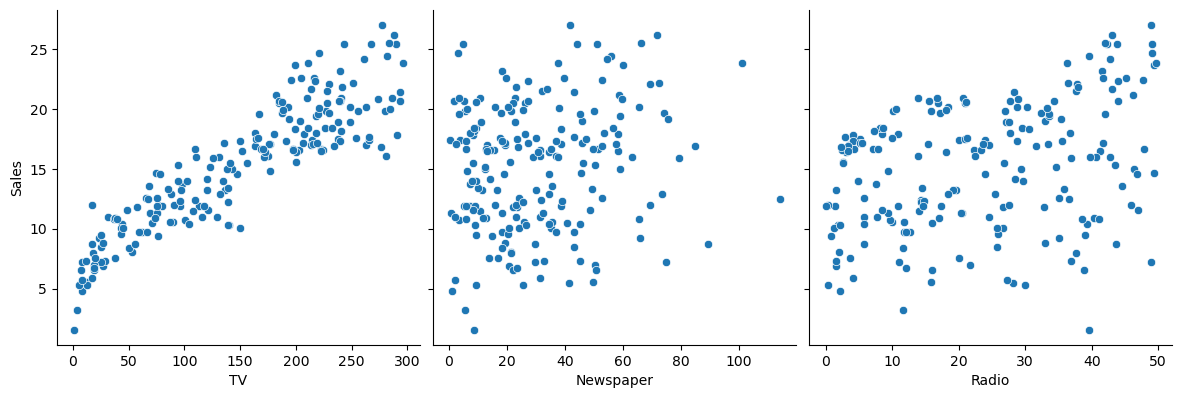

In [10]:
sns.pairplot(advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales',size=4, aspect=1, kind='scatter')
plt.show()

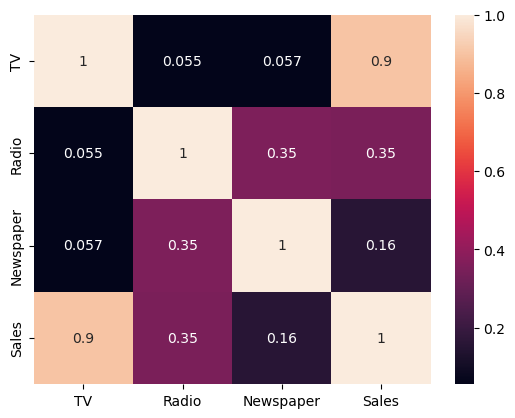

In [11]:
sns.heatmap(advertising.corr(), annot = True)
plt.show()

As is visible from the pairplot and the heatmap, the variable `TV` seems to be most correlated with `Sales`. So let's go ahead and perform simple linear regression using `TV` as our feature variable.

---
## Step 3: Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

---

### Generic Steps in model building using `statsmodels`

We first assign the feature variable, `TV`, in this case, to the variable `X` and the response variable, `Sales`, to the variable `y`.

In [12]:
X = advertising['TV']
y = advertising['Sales']

#### Train-Test Split

You now need to split our variable into training and testing sets. You'll perform this by importing `train_test_split` from the `sklearn.model_selection` library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [14]:
# Let's now take a look at the train dataset

X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [15]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

#### Building a Linear Model

You first need to import the `statsmodel.api` library using which you'll perform the linear regression.

In [16]:
import statsmodels.api as sm

By default, the `statsmodels` library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the `add_constant` attribute of `statsmodels`. And once you've added the constant to your `X_train` dataset, you can go ahead and fit a regression line using the `OLS` (Ordinary Least Squares) attribute of `statsmodels` as shown below

In [17]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [18]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [19]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Fri, 18 Jul 2025   Prob (F-statistic):           1.52e-52
Time:                        10:48:04   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

####  Looking at some key statistics from the summary

The values we are concerned with are - 
1. The coefficients and significance (p-values)
2. R-squared
3. F statistic and its significance

##### 1. The coefficient for TV is 0.054, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance. 

##### 2. R - squared is 0.816
Meaning that 81.6% of the variance in `Sales` is explained by `TV`

This is a decent R-squared value.

###### 3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

---
The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

$ Sales = 6.948 + 0.054 \times TV $

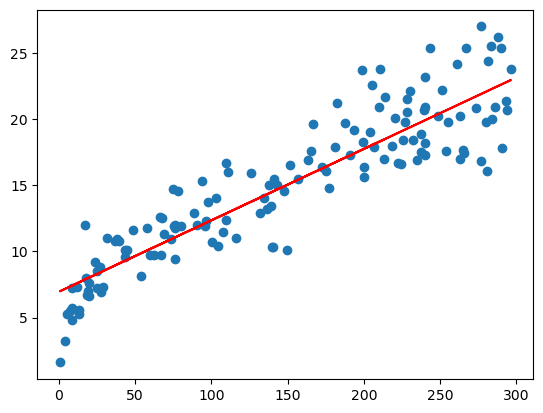

In [20]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

## Step 4: Residual analysis 
To validate assumptions of the model, and hence the reliability for inference

#### Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [21]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

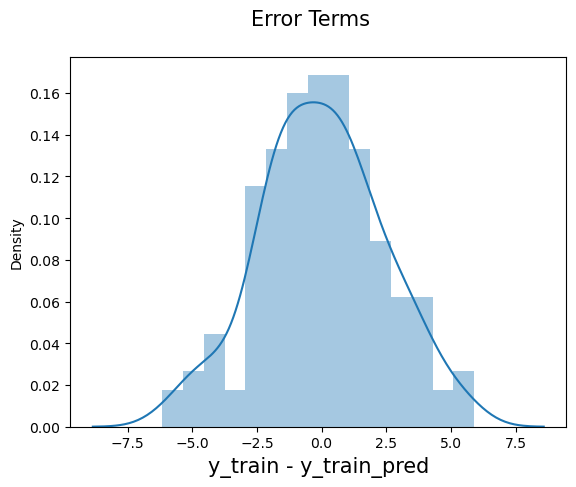

In [22]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

The residuals are following the normally distributed with a mean 0. All good!

#### Looking for patterns in the residuals

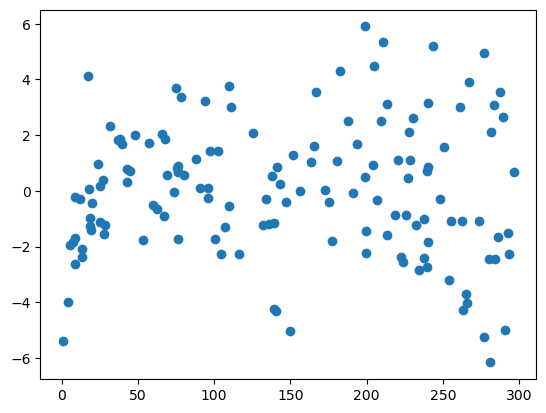

In [23]:
plt.scatter(X_train,res)
plt.show()

We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.

Although, the variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.

As you can see, the regression line is a pretty good fit to the data

## Step 5: Predictions on the Test Set

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the `X_test` data like you did for `X_train` and then you can simply go on and predict the y values corresponding to `X_test` using the `predict` attribute of the fitted regression line.

In [24]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [25]:
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

##### Looking at the RMSE

In [27]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

2.0192960089662324

###### Checking the R-squared on the test set

In [28]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.7921031601245658

##### Visualizing the fit on the test set

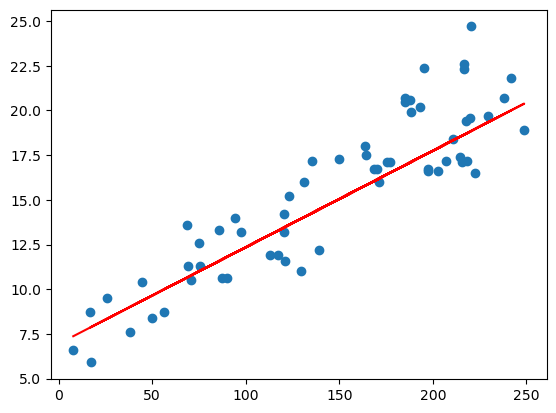

In [29]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()

### Linear Regression using `linear_model` in `sklearn`

Apart from `statsmodels`, there is another package namely `sklearn` that can be used to perform linear regression. We will use the `linear_model` library from `sklearn` to build the model. Since, we hae already performed a train-test split, we don't need to do it again.

There's one small step that we need to add, though. When there's only a single feature, we need to add an additional column in order for the linear regression fit to be performed successfully.

In [30]:
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [31]:
X_train_lm.shape

(140,)

In [32]:
X_train_lm = X_train_lm.reshape(-1,1)
X_test_lm = X_test_lm.reshape(-1,1)

AttributeError: 'Series' object has no attribute 'reshape'

In [ ]:
print(X_train_lm.shape)
print(y_train_lm.shape)
print(X_test_lm.shape)
print(y_test_lm.shape)

In [ ]:
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

# Fit the model using lr.fit()
lm.fit(X_train_lm, y_train_lm)

In [ ]:
print(lm.intercept_)
print(lm.coef_)

The equationwe get is the same as what we got before!

$ Sales = 6.948 + 0.054* TV $

Sklearn linear model is useful as it is compatible with a lot of sklearn utilites (cross validation, grid search etc.)

---
## Addressing some common questions/doubts on Simple Linear Regression
---

### Q: Why is it called 'R-squared'?

Based on what we learnt so far, do you see it? Can you answer this?
 
 
 
 
 
 

.

.
 
.

.
 
  #### Drumroll...
  
.
 
.

.

.

In [ ]:
corrs = np.corrcoef(X_train, y_train)
print(corrs)

In [ ]:
corrs[0,1] ** 2

Correlation (Pearson) is also called **"r"** or **"Pearson's R"**

### Q: What is a good RMSE? Is there some RMSE that I should aim for?

<br>

<br>

You should be able to answer this by now!


<br>


<br>



Look at "Sharma ji ka beta"; he could answer this in a moment. How lucky is Sharma ji to have such a smart kid!

.

.
 
.

.
 
  #### Drumroll...
  
.
 
.

.

.

The RMSE:
 - depends on the units of the Y variables
 - is NOT a normalized measure
 
While it can't really tell you of the gooodness of the particular model, it can help you compare models. 

A better measure is R squared, which is normalized.

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

### Q: Does scaling have an impact on the model? When should I scale?

<br>
<br>
<br>
<br>
<br>
<br>

While the true benefits of scaling will be apparent during future modules, at this juncture we can discuss if it has an impact on the model.

We'll rebuild the model after scaling the predictor and see what changes.

The most popular methods for scaling:
1. Min-Max Scaling
2. Standard Scaling

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

#### SciKit Learn has these scaling utilities handy

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
# One aspect that you need to take care of is that the 'fit_transform' can be performed on 2D arrays only. So you need to
# reshape your 'X_train_scaled' and 'y_trained_scaled' data in order to perform the standardisation.
X_train_scaled = X_train.reshape(-1,1)
y_train_scaled = y_train.reshape(-1,1)

In [ ]:
X_train_scaled.shape

In [ ]:
# Create a scaler object using StandardScaler()
scaler = StandardScaler()
#'Fit' and transform the train set; and transform using the fit on the test set later
X_train_scaled = scaler.fit_transform(X_train_scaled)
y_train_scaled = scaler.fit_transform(y_train_scaled)

In [ ]:
print("mean and sd for X_train_scaled:", np.mean(X_train_scaled), np.std(X_train_scaled))
print("mean and sd for y_train_scaled:", np.mean(y_train_scaled), np.std(y_train_scaled))

In [ ]:
# Let's fit the regression line following exactly the same steps as done before
X_train_scaled = sm.add_constant(X_train_scaled)

lr_scaled = sm.OLS(y_train_scaled, X_train_scaled).fit()

In [ ]:
# Check the parameters
lr_scaled.params

As you might notice, the value of the parameters have changed since we have changed the scale.

Let's look at the statistics of the model, to see if any other aspect of the model has changed.

In [ ]:
print(lr_scaled.summary())

#### Model statistics and goodness of fit remain unchanged.

##### So why scale at all?
- Helps with interpretation (we'll be able to appreciate this better in later modules)
- Faster convergence of gradient descent

## SIMPLE LINEAR REGRESSION

In [33]:
import statsmodels
import statsmodels.api as sm
import sklearn 

## Steps:
- Create X and Y
- Create train and test sets(70-30,80-20)
- Train your model on the training set(i.e learn the coefficients)
- Evaluate the model (training set, test set)

In [34]:
advertising=pd.read_csv("advertising.csv")

In [35]:
#Create X and Y

X= advertising['TV']
y=advertising['Sales']

In [55]:
#Create train and test sets(70-30,80-20) split
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.70,random_state=100)

In [38]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(140,)
(60,)
(140,)
(60,)


In [39]:
#Training the model
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [40]:
X_train_sm=sm.add_constant(X_train)
X_train_sm.head()

const     TV
74     1.0  213.4
3      1.0  151.5
185    1.0  205.0
26     1.0  142.9
90     1.0  134.3

In [41]:
#y =c + m1.X1 
#y= c.const + m1.TV

#fitting the model
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()

In [42]:
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [43]:
# Sales= 6.94 +0.05TV

In [44]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Fri, 18 Jul 2025   Prob (F-statistic):           1.52e-52
Time:                        10:48:38   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# 1. Coef and p-value
# 2. R-squared is 81.6% very high
# 3. p(F-statistic) is low=>the fit is not by chance(genuine)

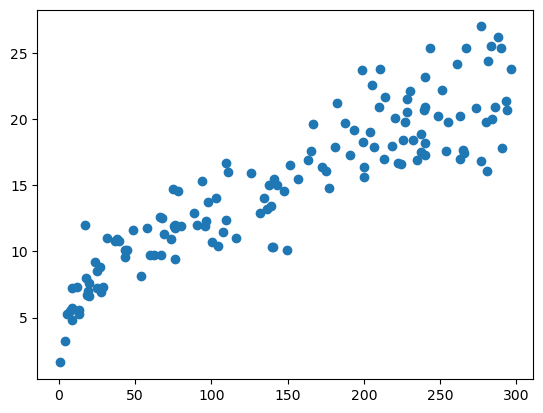

In [46]:
plt.scatter(X_train,y_train)

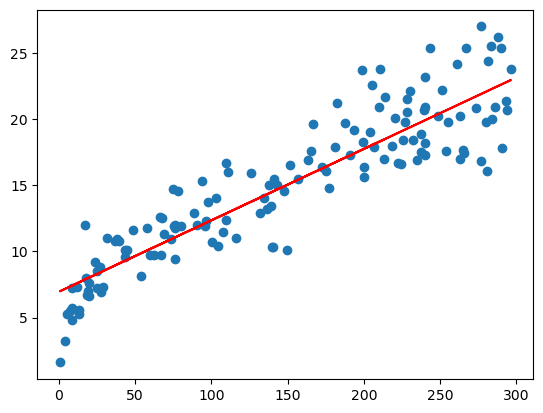

In [47]:
plt.scatter(X_train,y_train)
plt.plot(X_train,6.948+0.054*X_train,"r")
plt.show()

1. Reading and Understanding the data
2. Training the mode1
3. Residual Analysis (should be normally distributed)
4. Predicting and evaluating the model on the test set


### RESIDUAL ANALYSIS

In [48]:
# error= f(y_train , y_train_predicted)

y_train_pred=lr_model.predict(X_train_sm)
y_train_pred

74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
         ...    
87     12.986898
103    17.197830
67     14.546907
24     10.346884
8       7.417777
Length: 140, dtype: float64

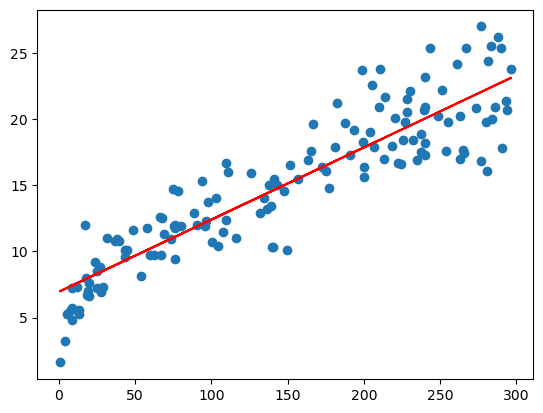

In [49]:
plt.scatter(X_train,y_train)
plt.plot(X_train,y_train_pred,"r")
plt.show()

In [50]:
res=y_train-y_train_pred

Text(0.5, 1.0, 'Residuals plot')

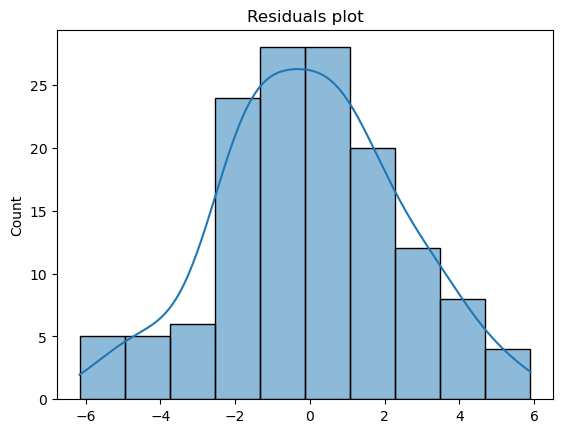

In [51]:
#plot the residuals
plt.figure()
sns.histplot(res, kde=True)
plt.title("Residuals plot")
#Errors are normally distributed

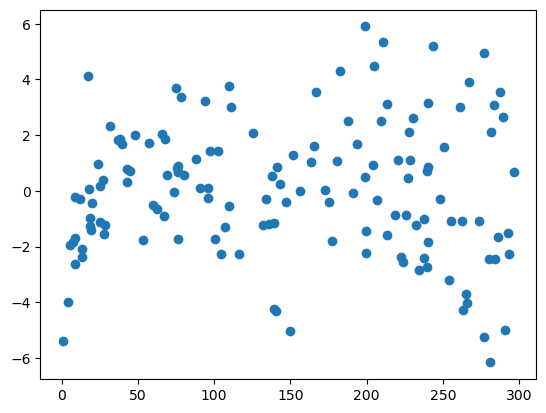

In [52]:
# look for the patterns in residual
plt.scatter(X_train,res)
plt.show()

### Prediction and evaluation on the test set

In [55]:
# predictions on the test set (y_test_pred)
# evaluate the model, r-squared,on the test

In [54]:
# add a cons/intercept to test
X_test_sm=sm.add_constant(X_test)

# pred on test
y_test_pred=lr_model.predict(X_test_sm)
y_test_pred

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
167    18.228745
116    14.541452
96     17.726924
52     18.752384
69     18.774202
164    13.341445
124    19.466933
182    10.014155
154    17.192376
125    11.705073
196    12.086893
194    15.114182
177    16.232370
163    15.866914
31     13.106899
11     18.659656
73     14.006904
15     17.606923
41     16.603281
97     17.034193
128    18.965113
133    18.937840
82     11.055978
139    17.034193
123    13.663265
83     10.679613
65     10.712340
151    13.548719
162    17.225103
170     9.675971
77     13.521446
32     12.250530
173    16.134188
174    19.079659
85     17.486923
168    18.697838
112    16.532372
171    15.921460
181    18.866930
7      13.505083
46     11.841437
75      7.870506
28     20.519667
29     10.799613
195     9.032331
40     17.994198
153    16.292371
115    11.045069
64     14.099631
59     18.441473
1       9.375969
192     7.886870
136     8.345054
152    17.7269

In [56]:
r2=r2_score(y_true=y_test,y_pred=y_test_pred)
r2

0.7921031601245658

In [57]:
#r2 on train
r2_score(y_true=y_train,y_pred=y_train_pred)

0.8157933136480389

In [58]:
#mean squared error

mean_squared_error(y_true=y_test,y_pred=y_test_pred)

4.077556371826955

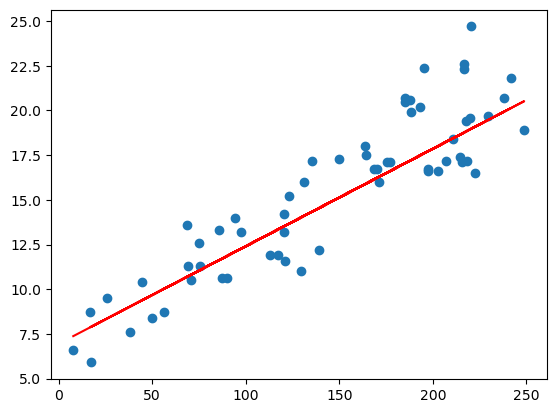

In [59]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_test_pred,"r")
plt.show()

### LINEAR REGRESSION MODEL USING sklearn

In [60]:
# train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.70,random_state=100)

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
X_train.shape

(140,)

In [ ]:
#(140,1)
#(140,)

In [63]:
#reshape to (140,1)

X_train_lm=X_train.values.reshape(-1,1)
X_test_lm=X_test.values.reshape(-1,1)


In [64]:
print(X_train_lm.shape)
print(X_test_lm.shape)

(140, 1)
(60, 1)


In [65]:
#steps in sklearn model building
#1. create an object of linear regression
lm=LinearRegression()

#2. fit the model
lm.fit(X_train_lm,y_train)


LinearRegression()

In [66]:
help(lm)

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |  
 |  n_jobs : int, default=None
 |      The number of jobs to use for the computation. This will only provide
 | 

In [69]:
#3. see the params make predictions(train,test)
print(lm.coef_) #(y=mx+c) it's m here 
print(lm.intercept_) #(y=mx+c) it's c  here

[0.05454575]
6.948683200001357


In [70]:
# make predictions
y_train_pred=lm.predict(X_train_lm)
y_test_pred=lm.predict(X_test_lm)


In [71]:
#4. evaluate(r2,etc)
print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))


0.8157933136480389
0.7921031601245662
